In [49]:
import soundfile as sf

 import numpy as np
import matplotlib.pyplot as plt

from scipy import signal
from scipy.fftpack import fft,dct

import librosa
from librosa.filters import mel as ml

### 1. Mel filterbank (1 point)

#### a) Load the given audio file

In [50]:
s, sr = librosa.load("audio5.wav", sr=None)

#### b) Create a mel filterbank using librosa

In [51]:
#sr = # from a)
n_fft = 512
n_mel = 40
mel_filterbank = ml(sr=sr, n_fft=n_fft, n_mels=n_mel)

#### c) Plot the mel filterbank

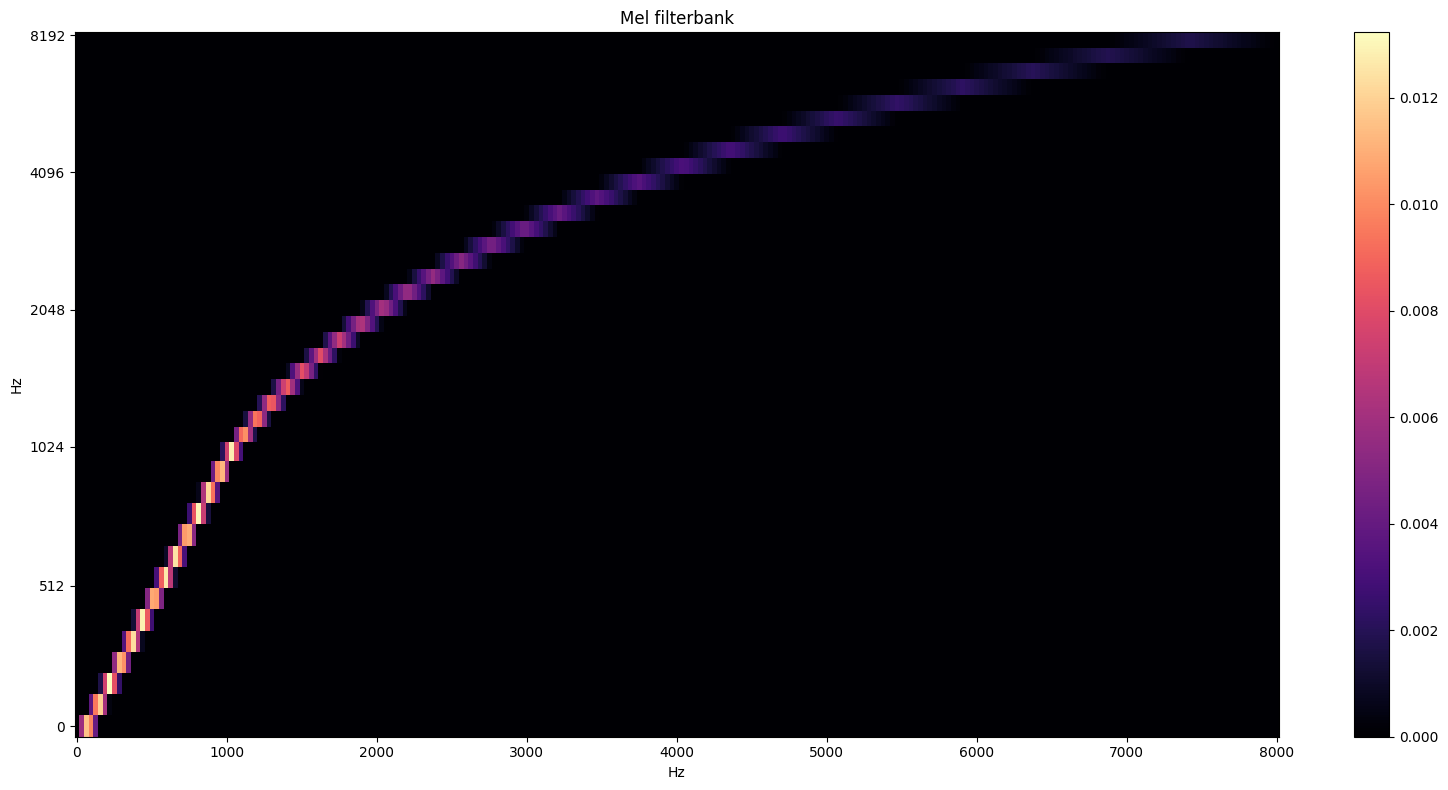

In [52]:
plt.figure(figsize=(16, 8))
librosa.display.specshow(
        mel_filterbank,
        x_axis='linear',  
        y_axis='mel',  
        sr=sr,
        hop_length=1   
    )
plt.colorbar()
plt.title("Mel filterbank")
plt.tight_layout()
plt.show()

#### Report your observations

In [14]:
print(sr)

16000


#### <font color='#A52A2A'> Process Explanation

**Mel Filterbanks** are one very common method in audio and speech processing. With this method, we try to model for a computer the same way a human ear perceives sound.

Since the human ear is more sensitive to lower frequencies and can discern small changes in the lower frequency range better compared to the same change in the high frequency range, the Mel scale tries to implement a linear scaling in lower frequencies and a logarithmic scaling in higher frequencies. The filter bank itself is a set of Band-pass Filters which divides the frequency spectrum into several bands.


#### <font color='#A52A2A'> Observations Refined

My observations regarding the plot are as follows:

- The horizontal axis (X-axis) extends up to 8000 Hz, which is the Nyquist frequency (half of the sampling frequency, which in this case is likely 16000 Hz).

- I can see that in the low frequency range (the left side of the plot), the filter density is higher compared to the high frequency range. This means we have more filters packed into the low-frequency part.

- In the higher frequency range, the filters are stretched wider and have more distance from each other.

- This structure means that in the low frequency range, we have a more detailed/accurate representation (higher frequency resolution), and in the high frequency range, the representation is less detailed (lower frequency resolution), which accurately simulates human hearing perception.

### 2. MFCC (1 point)

#### a) Pre-emphasis the audio signal

In [53]:
pre_emphasis = 0.97
s_ = np.append(s[0], s[1:] - pre_emphasis * s[:-1])

#### b) Implement a stft loop for each frame 

In [71]:
#frame_length //frame_step
n_frames = int(1 + (len(s_) - int(0.025 * sr)) // int(0.010 * sr))
mfccs = np.zeros((40,n_frames),dtype=np.float32)

power_spectro = np.zeros((n_fft//2 + 1, n_frames), dtype=np.float32)
mel_spectro_all = np.zeros((n_mel, n_frames), dtype=np.float32)

for i in np.arange(0,n_frames):   
    # Frame indices
    start = i * int(0.010 * sr)   #frame_step
    end   = start + int(0.025 * sr) #frame_length
    
    s_seg =  s_[start:end]       
    s_win_seg = s_seg * np.hamming(int(0.025 * sr))  # Window each frame using hamming window    
    spectrum  = np.fft.fft(s_win_seg, n=n_fft) # Calculate fft
    spectrum=spectrum[:n_fft//2+1] 
    power_spectrum = (1.0 / n_fft) * (np.abs(spectrum) ** 2) # Collect the power spectrum
    power_spectro[:, i] = power_spectrum
    mel_spectro= np.dot(mel_filterbank, power_spectrum) # Multiply it with the mel filterbank 
    mel_spectro_all[:, i] = mel_spectro


    log_mel_spectrum = np.log(mel_spectro + 1e-10) # Take log operation
    mfcc = dct(log_mel_spectrum, type=2, norm='ortho')[:40] # Apply DCT
    mfccs[:, i] = mfcc


n_frames:  248
frame_step:  160
frame_length:  400


#### c.1) Plot logarithmic power spectrogram

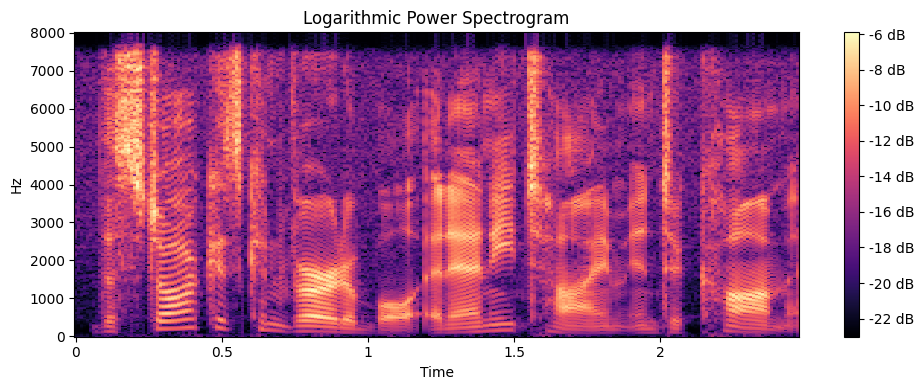

In [61]:
log_power_spectro = np.log(power_spectro + 1e-10)

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    log_power_spectro,
    sr=sr,
    hop_length=int(0.010 * sr),
    x_axis='time',
    y_axis='linear'
)
plt.colorbar(format="%+2.f dB")
plt.title("Logarithmic Power Spectrogram")
plt.tight_layout()
plt.show()

#### c.2) Plot mel spectrogram

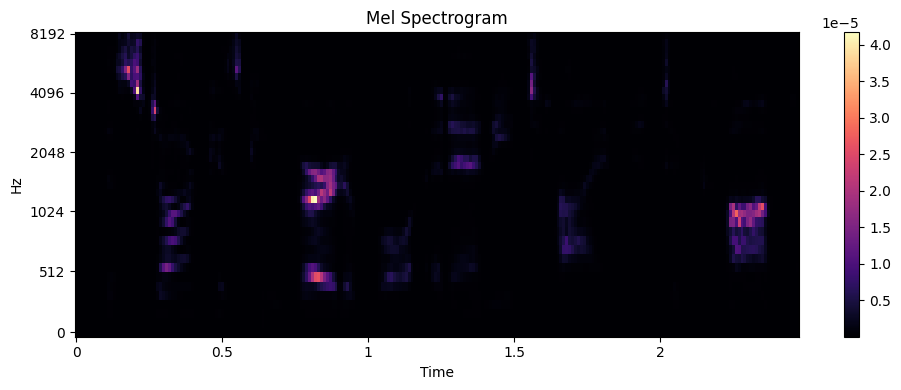

In [63]:

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mel_spectro_all,
    sr=sr,
    hop_length=int(0.010 * sr),
    x_axis='time',
    y_axis='mel'
)
plt.colorbar()
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()

#### c.3) Plot logarithmic mel spectrogram

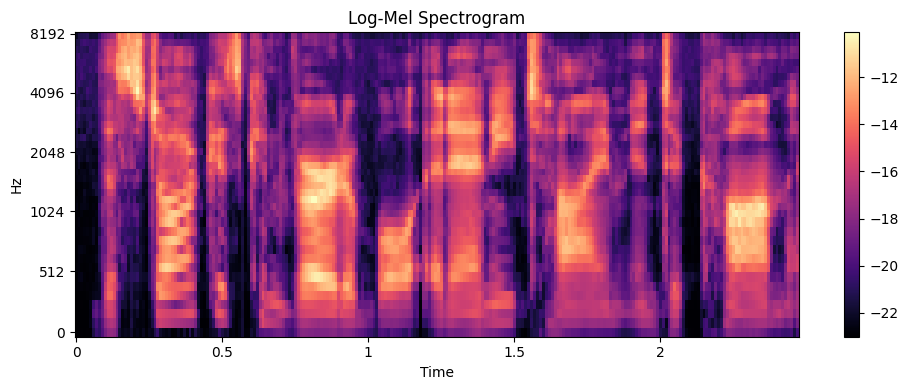

In [65]:
log_mel_spectro_all = np.log(mel_spectro_all + 1e-10)

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    log_mel_spectro_all,
    sr=sr,
    hop_length=int(0.010 * sr),
    x_axis='time',
    y_axis='mel'
)
plt.colorbar()
plt.title("Log-Mel Spectrogram")
plt.tight_layout()
plt.show()

#### c.4) Plot MFCC

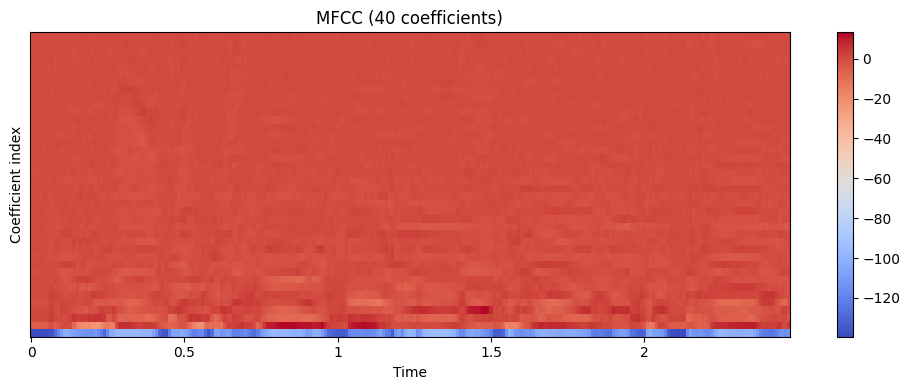

In [67]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(
    mfccs,
    sr=sr,
    hop_length=int(0.010 * sr),
    x_axis='time'
)
plt.colorbar()
plt.title("MFCC (40 coefficients)")
plt.ylabel("Coefficient index")
plt.tight_layout()
plt.show()


#### d) Implement MFCC using librosa

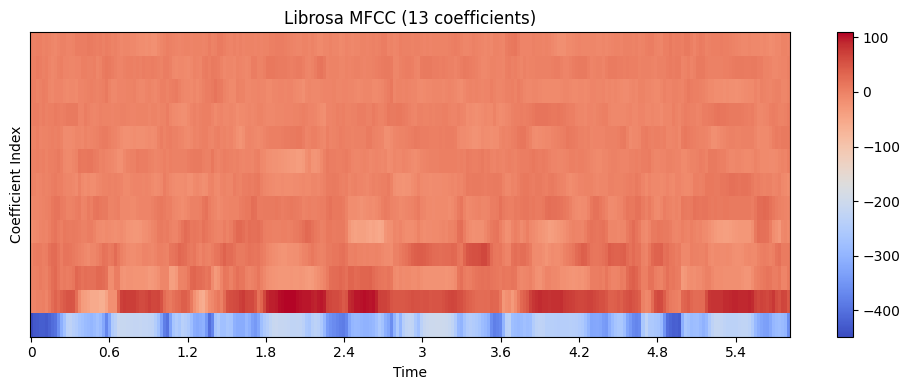

In [74]:

n_mfcc=13
n_mels=40
librosa_mfcc = librosa.feature.mfcc(y=s, sr=sr,
                                    n_fft=n_fft,
                                    hop_length=int(0.010 * sr),
                                    n_mfcc=n_mfcc,
                                    n_mels=n_mels,
                                    htk=False)

# Plot Librosa's MFCC (typically 13 coefficients)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa_mfcc, x_axis='time')
plt.title(f'Librosa MFCC ({n_mfcc} coefficients)')
plt.ylabel('Coefficient Index')
plt.colorbar()
plt.tight_layout()
plt.show()

#### Report your observations

#### <font color='#A52A2A'> Observations Refined

**Audio Features (MFCCs)**

This process takes a sound and turns it into a simple code (MFCCs) that a computer can easily understand for tasks like telling the difference between a car and a tram.



1. Logarithmic power spectrogram 

This is the initial picture of the sound, showing its **energy**, loudness, across all frequencies over time. All details are shown equally, like a regular photo. 

2. Mel spectrogram, focusing on the human ear

The computer applies a special **"Mel filter"** that focuses the details on the frequencies the human ear is most sensitive to (the lower pitches). Higher pitches get less detail.

3. Log-Mel Spectrogram (Highlighting Differences)

We take the **logarithm** of the Mel picture. This makes the **small differences** in sound energy much more obvious and clearer, like adjusting the contrast and brightness on a photo. 



Comparison with Librosa

Comparing my code to the Librosa library showed that:

* **Pattern is Correct:** My code produced the **right pattern** (the structure looks the same).
* **Numbers are Different:** The exact numbers are slightly different because Librosa uses specific, optimized math rules that are hard to match exactly.

### Bonus problem: Implement your own mel filterbank.